### Loading the DataSet

In [4]:
import pandas as pd
import numpy as np
import spacy

In [5]:
animes = pd.read_csv("./data/animes.csv")

In [6]:
animes

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...
...,...,...,...,...,...,...,...,...,...,...,...,...
19306,32979,Flip Flappers,Cocona is an average middle schooler living wi...,"['Sci-Fi', 'Adventure', 'Comedy', 'Magic']","Oct 6, 2016 to Dec 29, 2016",13.0,134252,843,1070.0,7.73,https://cdn.myanimelist.net/images/anime/4/822...,https://myanimelist.net/anime/32979/Flip_Flappers
19307,123,Fushigi Yuugi,"While visiting the National Library, junior-hi...","['Adventure', 'Fantasy', 'Magic', 'Martial Art...","Apr 6, 1995 to Mar 28, 1996",52.0,84407,1292,1071.0,7.73,https://cdn.myanimelist.net/images/anime/2/201...,https://myanimelist.net/anime/123/Fushigi_Yuugi
19308,1281,Gakkou no Kaidan,"Years ago, all of the ghosts in a haunted scho...","['Mystery', 'Horror', 'Supernatural']","Oct 22, 2000 to Mar 25, 2001",19.0,83093,1314,1073.0,7.73,https://cdn.myanimelist.net/images/anime/9/183...,https://myanimelist.net/anime/1281/Gakkou_no_K...
19309,450,InuYasha Movie 2: Kagami no Naka no Mugenjo,Inuyasha and company have finally destroyed Na...,"['Action', 'Adventure', 'Comedy', 'Historical'...","Dec 21, 2002",1.0,71989,1469,1077.0,7.73,https://cdn.myanimelist.net/images/anime/1162/...,https://myanimelist.net/anime/450/InuYasha_Mov...


In [7]:
animes[animes['synopsis'].isna()]

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
29,9563,Hidamari Sketch x ☆☆☆ Specials,NaN,"['Slice of Life', 'Comedy', 'School', 'Seinen']","Oct 23, 2010 to Oct 30, 2010",2.0,11600,4073,790.0,7.86,https://cdn.myanimelist.net/images/anime/3/264...,https://myanimelist.net/anime/9563/Hidamari_Sk...
31,33280,Gochuumon wa Usagi Desu ka??: Dear My Sister,NaN,"['Slice of Life', 'Comedy']","Nov 11, 2017",1.0,20779,3141,788.0,7.86,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/33280/Gochuumon_...
42,36160,Yaoguai Mingdan 2nd Season,NaN,"['Action', 'Comedy', 'Romance', 'Fantasy']","Aug 2, 2017 to Dec 29, 2017",21.0,5238,5659,777.0,7.87,https://cdn.myanimelist.net/images/anime/4/874...,https://myanimelist.net/anime/36160/Yaoguai_Mi...
212,36370,Ginga Eiyuu Densetsu: Die Neue These - Seiran 2,NaN,"['Action', 'Drama', 'Military', 'Sci-Fi', 'Spa...","Oct 25, 2019",4.0,8711,4598,598.0,8.00,https://cdn.myanimelist.net/images/anime/1215/...,https://myanimelist.net/anime/36370/Ginga_Eiyu...
216,39565,Boku no Hero Academia the Movie 2: Heroes:Rising,NaN,"['Action', 'Comedy', 'Super Power', 'School', ...","Dec 20, 2019",1.0,75929,1408,594.0,7.97,https://cdn.myanimelist.net/images/anime/1019/...,https://myanimelist.net/anime/39565/Boku_no_He...
...,...,...,...,...,...,...,...,...,...,...,...,...
19075,38262,Pingu in the City (2018),NaN,"['Slice of Life', 'Comedy', 'Kids']","Oct 6, 2018 to Mar 30, 2019",26.0,7507,4883,882.0,7.82,https://cdn.myanimelist.net/images/anime/1315/...,https://myanimelist.net/anime/38262/Pingu_in_t...
19157,39741,Violet Evergarden Gaiden: Eien to Jidou Shuki ...,NaN,"['Slice of Life', 'Drama', 'Fantasy']","Sep 6, 2019",1.0,44496,2047,967.0,7.78,https://cdn.myanimelist.net/images/anime/1425/...,https://myanimelist.net/anime/39741/Violet_Eve...
19223,34374,Yuuki Yuuna wa Yuusha de Aru: Washio Sumi no S...,NaN,"['Slice of Life', 'Drama', 'Magic', 'Fantasy']","Mar 18, 2017",1.0,10035,4347,1088.0,7.73,https://cdn.myanimelist.net/images/anime/5/864...,https://myanimelist.net/anime/34374/Yuuki_Yuun...
19242,37773,"Yuru Yuri,",NaN,"['Slice of Life', 'Comedy', 'School', 'Shoujo ...","Sep 18, 2019",1.0,13788,3824,1062.0,7.74,https://cdn.myanimelist.net/images/anime/1138/...,https://myanimelist.net/anime/37773/Yuru_Yuri


In [8]:
animes.columns


Index(['uid', 'title', 'synopsis', 'genre', 'aired', 'episodes', 'members',
       'popularity', 'ranked', 'score', 'img_url', 'link'],
      dtype='object')

In [9]:
animes.synopsis

0        Following their participation at the Inter-Hig...
1        Music accompanies the path of the human metron...
2        The Abyss—a gaping chasm stretching down into ...
3        "In order for something to be obtained, someth...
4        After helping revive the legendary vampire Kis...
                               ...                        
19306    Cocona is an average middle schooler living wi...
19307    While visiting the National Library, junior-hi...
19308    Years ago, all of the ghosts in a haunted scho...
19309    Inuyasha and company have finally destroyed Na...
19310    The year is Universal Century 0093. Char Aznab...
Name: synopsis, Length: 19311, dtype: object

### preprocessing

In [10]:
animes = animes[["synopsis","genre"]]

In [11]:
animes

,synopsis,genre
0,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun..."
1,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun..."
2,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F..."
3,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ..."
4,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']"
...,...,...
19306,Cocona is an average middle schooler living wi...,"['Sci-Fi', 'Adventure', 'Comedy', 'Magic']"
19307,"While visiting the National Library, junior-hi...","['Adventure', 'Fantasy', 'Magic', 'Martial Art..."
19308,"Years ago, all of the ghosts in a haunted scho...","['Mystery', 'Horror', 'Supernatural']"
19309,Inuyasha and company have finally destroyed Na...,"['Action', 'Adventure', 'Comedy', 'Historical'..."


In [12]:
import ast

# Assuming 'genre' is the column containing string representations of lists
animes["genre"] = animes["genre"].apply(lambda x: ast.literal_eval(x))


C:\Users\HP\AppData\Local\Temp\ipykernel_10252\2197205818.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animes["genre"] = animes["genre"].apply(lambda x: ast.literal_eval(x))


In [13]:
animes

,synopsis,genre
0,Following their participation at the Inter-Hig...,"[Comedy, Sports, Drama, School, Shounen]"
1,Music accompanies the path of the human metron...,"[Drama, Music, Romance, School, Shounen]"
2,The Abyss—a gaping chasm stretching down into ...,"[Sci-Fi, Adventure, Mystery, Drama, Fantasy]"
3,"""In order for something to be obtained, someth...","[Action, Military, Adventure, Comedy, Drama, M..."
4,After helping revive the legendary vampire Kis...,"[Action, Mystery, Supernatural, Vampire]"
...,...,...
19306,Cocona is an average middle schooler living wi...,"[Sci-Fi, Adventure, Comedy, Magic]"
19307,"While visiting the National Library, junior-hi...","[Adventure, Fantasy, Magic, Martial Arts, Come..."
19308,"Years ago, all of the ghosts in a haunted scho...","[Mystery, Horror, Supernatural]"
19309,Inuyasha and company have finally destroyed Na...,"[Action, Adventure, Comedy, Historical, Demons..."


In [14]:
from sklearn.preprocessing import MultiLabelBinarizer
# Convert genres to binary representation
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(animes['genre'])

In [15]:
for (category, i) in zip(mlb.classes_, range(len(y[0]))):
    animes[category] = y[:,i]

C:\Users\HP\AppData\Local\Temp\ipykernel_10252\548302247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animes[category] = y[:,i]
C:\Users\HP\AppData\Local\Temp\ipykernel_10252\548302247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animes[category] = y[:,i]
C:\Users\HP\AppData\Local\Temp\ipykernel_10252\548302247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

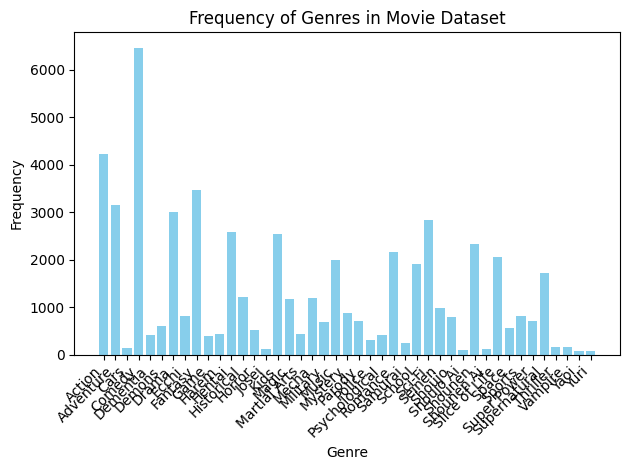

In [16]:
from matplotlib import pyplot as plt
genres = animes[['Action', 'Adventure', 'Cars', 'Comedy',
       'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem',
       'Hentai', 'Historical', 'Horror', 'Josei', 'Kids', 'Magic',
       'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody',
       'Police', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi',
       'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai',
       'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural',
       'Thriller', 'Vampire', 'Yaoi', 'Yuri']]

plt.bar(genres.keys(), genres.sum(), color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Frequency of Genres in Movie Dataset')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


In [17]:
genres = (genres.sum()>1500)
true_indexes = genres[genres].index

In [18]:
true_indexes

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Fantasy', 'Hentai', 'Kids',
       'Music', 'Romance', 'School', 'Sci-Fi', 'Shounen', 'Slice of Life',
       'Supernatural'],
      dtype='object')

In [19]:
genres_chosed = animes[true_indexes]

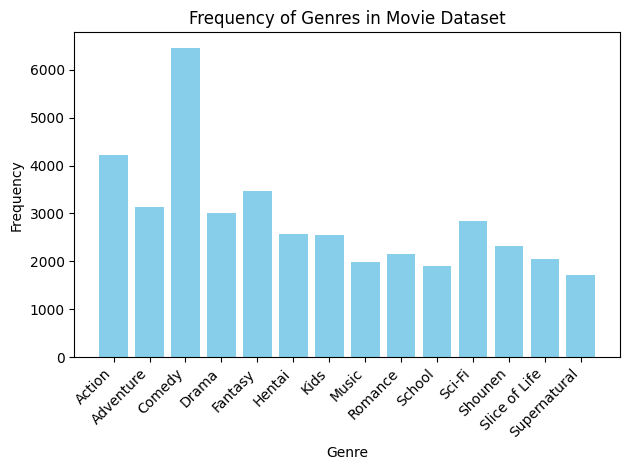

In [20]:
plt.bar(genres_chosed.keys(), genres_chosed.sum(), color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Frequency of Genres in Anime Dataset')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


In [21]:
animes.columns

Index(['synopsis', 'genre', 'Action', 'Adventure', 'Cars', 'Comedy',
       'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem',
       'Hentai', 'Historical', 'Horror', 'Josei', 'Kids', 'Magic',
       'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody',
       'Police', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi',
       'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai',
       'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural',
       'Thriller', 'Vampire', 'Yaoi', 'Yuri'],
      dtype='object')

In [22]:
genres_chosed['synopsis'] = animes['synopsis']
animes = genres_chosed

C:\Users\HP\AppData\Local\Temp\ipykernel_10252\3719954312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres_chosed['synopsis'] = animes['synopsis']


In [23]:
animes

,Action,Adventure,Comedy,Drama,Fantasy,Hentai,Kids,Music,Romance,School,Sci-Fi,Shounen,Slice of Life,Supernatural,synopsis
0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,Following their participation at the Inter-Hig...
1,0,0,0,1,0,0,0,1,1,1,0,1,0,0,Music accompanies the path of the human metron...
2,0,1,0,1,1,0,0,0,0,0,1,0,0,0,The Abyss—a gaping chasm stretching down into ...
3,1,1,1,1,1,0,0,0,0,0,0,1,0,0,"""In order for something to be obtained, someth..."
4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,After helping revive the legendary vampire Kis...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19306,0,1,1,0,0,0,0,0,0,0,1,0,0,0,Cocona is an average middle schooler living wi...
19307,0,1,1,1,1,0,0,0,1,0,0,0,0,0,"While visiting the National Library, junior-hi..."
19308,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"Years ago, all of the ghosts in a haunted scho..."
19309,1,1,1,1,1,0,0,0,1,0,0,1,0,1,Inuyasha and company have finally destroyed Na...


In [24]:
animes = animes.dropna()
animes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18336 entries, 0 to 19310
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Action         18336 non-null  int32 
 1   Adventure      18336 non-null  int32 
 2   Comedy         18336 non-null  int32 
 3   Drama          18336 non-null  int32 
 4   Fantasy        18336 non-null  int32 
 5   Hentai         18336 non-null  int32 
 6   Kids           18336 non-null  int32 
 7   Music          18336 non-null  int32 
 8   Romance        18336 non-null  int32 
 9   School         18336 non-null  int32 
 10  Sci-Fi         18336 non-null  int32 
 11  Shounen        18336 non-null  int32 
 12  Slice of Life  18336 non-null  int32 
 13  Supernatural   18336 non-null  int32 
 14  synopsis       18336 non-null  object
dtypes: int32(14), object(1)
memory usage: 1.3+ MB


In [25]:
nlp = spacy.load('en_core_web_sm')

unwanted_pipes= ['ner','parser']
def tokanization(doc):

    with nlp.disable_pipes(*unwanted_pipes):
        return [t.lemma_ for t in nlp(doc) if  t.is_alpha and not t.is_punct and not t.is_space]



from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=tokanization , ngram_range=(1,2))
features = vectorizer.fit_transform(animes['synopsis'])

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [26]:
X = features
y = animes.drop(['synopsis'], axis= 1).values

### Choosing  the model

we will be evaluating the models based on their hamming loss and Jackard score rather than their accuracy since they serve more the perpose of classifying the shows.

the precision-in this case of multi label classificatition- can be calculated as the average of all the accuracies calculated by each single classifier (as we will discover, that in this case, a model is a combination of multible classifiers that each one predics if the element belongs to a specific class)

the precision in this case is not really usefull since a classifier can raise the score up while others are not really that good and we may not notice it. 

Hamming Loss measures the fraction of incorrectly predicted labels, which is suitable for multi-label classification tasks where instances can belong to multiple classes. Lower Hamming loss indicates better performance.

Jaccard Score evaluates the similarity between predicted and true label sets by comparing their intersection to their union. Higher Jaccard score signifies better agreement between predicted and true labels.

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)


In [28]:
from sklearn.calibration import LinearSVC
from sklearn.linear_model import LogisticRegression, SGDClassifier


sgd = SGDClassifier()
lr  = LogisticRegression(solver='lbfgs')
svc = LinearSVC()

In [29]:
from sklearn.metrics import hamming_loss, jaccard_score

def j_score(y_true, y_pred):
    jacard = np.minimum(y_true, y_pred).sum(axis=1)/ np.maximum(y_true, y_pred).sum(axis=1)
    return jacard

def print_score(y_pred, clf):
    print("clf : ", clf.__class__.__name__)
    print("Jacard score : {}".format(jaccard_score(y_test, y_pred, average='samples')))
    print("Hamming Loss : {}".format(hamming_loss(y_test,y_pred)))
    print("--------_--------")

In [30]:
# from sklearn.multiclass import OneVsRestClassifier

# for classifier in [sgd, lr, svc]:
#     clf = OneVsRestClassifier(classifier)
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)
#     print_score(y_pred, classifier)


######################################### result 

# clf :  SGDClassifier
# Jacard score : 0.38296593446538923
# Hamming Loss : 0.10061925533572208


# clf :  LogisticRegression
# Jacard score : 0.22932310328711636
# Hamming Loss : 0.12289686867113257


# clf :  LinearSVC
# Jacard score : 0.49213078361115437
# Hamming Loss : 0.08410577971646674

In [31]:
doc = "The story follows elven mage Frieren, a former member of the party of adventurers who defeated the Demon King and restored harmony to the world after a ten-year quest. In the past, the heroic group included Frieren, human hero Himmel, dwarven warrior Eisen, and human priest Heiter. Before they part, they observe the Era Meteors together, a meteor shower that occurs once in fifty years. Frieren agrees to see them again and offers them a better view the next time the celestial event occurs. Frieren then departs and travels the world in pursuit of magical knowledge."

In [32]:
vector = vectorizer.transform([doc])

In [33]:
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(svc)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.predict(vector)

array([[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [34]:
def show_labels_predicted(y_pred):
  s = []
  indexes = np.where(y_pred.reshape((-1,1)))[0]
  [s.append(animes.columns[i]) for i in indexes]
  return s


In [35]:
show_labels_predicted(clf.predict(vector))

['Adventure', 'Fantasy']

In [37]:
classifier2 = LinearSVC(C=1, loss='squared_hinge', max_iter=1000, tol=0.0001)
# Train the model
clf2 = OneVsRestClassifier(classifier2)
clf2.fit(X_train, y_train)

# Evaluate on the test set
y_pred = clf2.predict(X_test)
loss_ = hamming_loss(y_test, y_pred)

In [38]:
loss_

0.08410577971646674

In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score, hamming_loss

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')
hl = hamming_loss(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Hamming Loss:", hl)

Precision: 0.8898033836305441
Recall: 0.5035580282054599
F1-score: 0.6431463273568536
Hamming Loss: 0.08410577971646674


In [ ]:
# param_grid = {
#     'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
#     'loss': ['hinge', 'squared_hinge'],  # Loss function
#     'max_iter': [1000, 2000, 3000],  # Maximum number of iterations
#     'tol': [1e-4, 1e-3, 1e-2]  # Tolerance for stopping criteria
# }

# best_accuracy = 0
# best_params = None
# for C in param_grid['C']:
#     for loss in param_grid['loss']:
#         for max_iter in param_grid['max_iter']:
#             for tol in param_grid['tol']:

#                 classifier = LinearSVC(C=C, loss=loss, max_iter=max_iter, tol=tol)

#                 # Train the model
#                 clf = OneVsRestClassifier(classifier)
#                 clf.fit(X_train, y_train)

#                 # Evaluate on the test set
#                 y_pred = clf.predict(X_test)
#                 accuracy = precision_score(y_test, y_pred, average='micro')

#                 # Check if current combination is the best
#                 if accuracy > best_accuracy:
#                     best_accuracy = accuracy
#                     best_params = {'C': C, 'loss': loss, 'max_iter': max_iter, 'tol': tol}

# print("Best Accuracy:", best_accuracy)
# print("Best Parameters:", best_params)

# # Best Accuracy: 0.9405405405405406
# # Best Parameters: {'C': 0.1, 'loss': 'hinge', 'max_iter': 1000, 'tol': 0.0001}

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

Best Accuracy: 0.9405405405405406
Best Parameters: {'C': 0.1, 'loss': 'hinge', 'max_iter': 1000, 'tol': 0.0001}


In [40]:
vector = vectorizer.transform([doc])

In [44]:
classifier3 = LinearSVC(C=0.1, loss='hinge', tol=0.0001)
vector = vectorizer.transform([doc])
clf3 = OneVsRestClassifier(classifier3)
clf3.fit(X_train, y_train)
y_pred = clf3.predict(X_test)

precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')
hl = hamming_loss(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Hamming Loss:", hl)

Precision: 0.9405405405405406
Recall: 0.045025229654547805
F1-score: 0.08593653537473762
Hamming Loss: 0.14416186321856986


In [45]:

y_train_pred = clf3.predict(X_train)
precision = precision_score(y_train, y_train_pred, average='micro')
recall = recall_score(y_train, y_train_pred, average='micro')
f1 = f1_score(y_train, y_train_pred, average='micro')
hl = hamming_loss(y_train, y_train_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Hamming Loss:", hl)

Precision: 0.9399361022364218
Recall: 0.04752059441124212
F1-score: 0.09046740467404674
Hamming Loss: 0.14403560715259653


In [46]:
clf3.predict(vector)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [53]:
syn = """In Jujutsu Kaisen, all living beings emanate energy called Cursed Energy (呪力, Juryoku), which arises from negative emotions that naturally flow throughout the body. Ordinary people cannot control this flow in their bodies. As a result, they continually lose Cursed Energy, resulting in the birth of Curses (呪い, Noroi), a race of spiritual beings whose primary desire is to bring harm to humanity. These Curses are shown as gruesome monsters, onryō (vengeful spirit), yūrei (ghosts), and yōkai.

Jujutsu Sorcerers (呪術師, Jujutsushi, lit. "Cursed Technique Masters" or "Shamans") are people who control the flow of Cursed Energy in their bodies, allowing them to use it as they please and also to reduce its release. High-ranking Sorcerers and Curses can refine this energy and use it to perform Cursed Techniques (呪術式, Jujutsushiki), which tend to be unique to the user or their family. An advanced form of Cursed Technique is Domain Expansion (領域展開, Ryōiki Tenkai), which the users build a pocket dimension of variable size. Inside the Domain, all of their attacks are guaranteed to hit and will grow in strength."""

vector = vectorizer.transform([syn])


show_labels_predicted(clf.predict(vector))

['Action']

In [ ]:
# param_grid = {
#     'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
#     'loss': ['hinge', 'squared_hinge'],  # Loss function
#     'max_iter': [1000, 2000, 3000],  # Maximum number of iterations
#     'tol': [1e-4, 1e-3, 1e-2]  # Tolerance for stopping criteria
# }

# best_f1_score = 0
# best_params = None
# for C in param_grid['C']:
#     for loss in param_grid['loss']:
#         for max_iter in param_grid['max_iter']:
#             for tol in param_grid['tol']:

#                 classifier = LinearSVC(C=C, loss=loss, max_iter=max_iter, tol=tol)

#                 # Train the model
#                 clf = OneVsRestClassifier(classifier)
#                 clf.fit(X_train, y_train)

#                 # Evaluate on the test set
#                 y_pred = clf.predict(X_test)
#                 f1 = f1_score(y_test, y_pred, average='micro')

#                 # Check if current combination is the best
#                 if f1 > best_f1_score:
#                     best_f1_score = f1
#                     best_params = {'C': C, 'loss': loss, 'max_iter': max_iter, 'tol': tol}

# print("Best F1-score:", best_f1_score)
# print("Best Parameters:", best_params)



# 0.6631562401760452
# Best Parameters: {'C': 10, 'loss': 'hinge', 'max_iter': 1000, 'tol': 0.01}

In [54]:
classifier4 = LinearSVC(C=10, loss='hinge', tol=0.01)
vector = vectorizer.transform([doc])
clf4 = OneVsRestClassifier(classifier4)
clf4.fit(X_train, y_train)
y_pred = clf4.predict(X_test)

precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')
hl = hamming_loss(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Hamming Loss:", hl)

Precision: 0.8446446446446446
Recall: 0.5458662181394747
F1-score: 0.6631562401760452
Hamming Loss: 0.08346315625486836


In [55]:
clf4.predict(vector)

array([[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

the best model was the one with highest f1-score and the lowest hamming loss